# **Approach and Results**

This is the fourth iteration with three changes from Iter 3: (1) Moving Batch Norm after each convolution layer (2)  Dropout Layer after Batch Norm to reduce over fitting (3) Keeping number of channels fixed once a resolution of around 10x10 is reached

In [0]:
# https://keras.io/
# Istall keras in quiet mode without any output to stdout and then import keras
!pip install -q keras
import keras

In [0]:
# Make all other necessary imports, including the mnist dataset
import os
import numpy as np
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
# kernel regularization hyperparameter
ker_regul = 0.0001
# Number of epochs
epochs = 40
# Batch size
batch_size = 64
# Dropout
drout = 0.05

In [0]:
# Load the mnist data, load as train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

(60000, 28, 28)


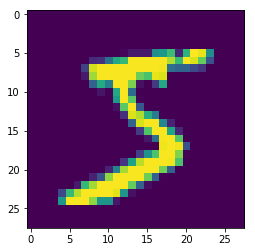

In [0]:
# Verify by checking shape and by plotting one image from the train data set
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])


In [0]:
# Explicitly reshape the train and test data into num samples x 28 x 28 x 1 channel
width, height, channels = X_train.shape[1], X_train.shape[2], 1
X_train = X_train.reshape(X_train.shape[0], width, height, channels)
X_test = X_test.reshape(X_test.shape[0], width, height, channels)

In [0]:
# Report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))


Statistics train=33.318 (78.567), test=33.791 (79.172)


In [0]:
# Convert the test and train data to float and then scale the values to the range [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator training set mean=%.3f, training set std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
iterator = datagen.flow(X_train, Y_train, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Data Generator training set mean=0.131, training set std=0.308
(64, 28, 28, 1) 0.002095252 1.0019991


In [0]:
# Print the first 10 training labels in original form
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices using utility function
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [0]:
# Show the first 10 entries in the 10 dimensional one hot encoded class arrays
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Build the model using Keras Sequential model, import Activation from keras as we will need relu and softmax activations

from keras.layers import Activation
model = Sequential()

# Start with 1 Convolution layer for input layer
model.add(Convolution2D(16, (3, 3), kernel_regularizer=regularizers.l2(ker_regul), input_shape=(28,28,1))) # Res=26x26
model.add(BatchNormalization())
model.add(Dropout(drout))

# Repeat conv block with 1 Convolution layer Batch Norm and Dropout
model.add(Convolution2D(16, (3, 3), kernel_regularizer=regularizers.l2(ker_regul))) # Res=24x24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(drout))


#Add Transition block Max Pooling to reduce resolution and 1x1 to reduce number of channels around 12x12
model.add(MaxPooling2D(pool_size=(2, 2))) # Res=12x12
model.add(Convolution2D(10, (1, 1))) # Res=12x12
model.add(BatchNormalization())
model.add(Activation('relu'))

# Repeat conv block with 1 Convolution layer Batch Norm and Dropout
model.add(Convolution2D(16, (3, 3), kernel_regularizer=regularizers.l2(ker_regul))) # Res=10x10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(drout))


# Repeat conv block with 1 Convolution layer Batch Norm and Dropout
model.add(Convolution2D(16, (3, 3), kernel_regularizer=regularizers.l2(ker_regul))) # Res=8x8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(drout))

# Repeat conv block with 1 Convolution layer Batch Norm and Dropout
model.add(Convolution2D(16, (3, 3), kernel_regularizer=regularizers.l2(ker_regul))) # Res=6x6
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(drout))

# Repeat conv block with 1 Convolution layer Batch Norm and Dropout
model.add(Convolution2D(16, (3, 3), kernel_regularizer=regularizers.l2(ker_regul))) # Res=4x4
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(drout))

# Output Convolution without activation that will feed into a softmax activation
model.add(Convolution2D(10, (4,4), kernel_regularizer=regularizers.l2(ker_regul))) #Res=1x1
model.add(Flatten()) # we flatten the input into a vector to feed to softmax
model.add(Activation('softmax')) # activation needed to carry out 10 way classification

In [0]:
# Summary of the model created above
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_13 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_15 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 16)        0         
__________

In [0]:
# Implement One Cycle Policy Algorithm in the Keras Callback Class

from sklearn.metrics import log_loss, roc_auc_score, accuracy_score
from keras.losses import binary_crossentropy
from keras.metrics import binary_accuracy
from keras import backend as K
from keras.callbacks import *

class SlantedCylicLR(keras.callbacks.Callback):
    
    def __init__(self,base_lr, max_lr, step_size, base_m, max_m, cyclical_momentum, inc_fraction):
 
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.base_m = base_m
        self.max_m = max_m
        self.cyclical_momentum = cyclical_momentum
        self.step_size = step_size
        self.cycle_length = np.int(2*step_size)
        self.inc_fraction = inc_fraction
        
        self.clr_iterations = 0.
        self.cm_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}
        
        
    def clr(self):
      
      cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
      
      if self.clr_iterations <= self.cycle_length*self.inc_fraction:
        unit_cycle = self.clr_iterations * 1 / (self.cycle_length * self.inc_fraction)
        adjusted_cycle = (unit_cycle * (self.max_lr - self.base_lr)) + self.base_lr
        return adjusted_cycle
      
      elif (self.cycle_length*self.inc_fraction < self.clr_iterations <= self.cycle_length):
        unit_cycle = (self.cycle_length - self.clr_iterations) * 1 / (self.cycle_length * (1 - self.inc_fraction))
        adjusted_cycle = (unit_cycle * (self.max_lr - self.base_lr)) + self.base_lr
        return adjusted_cycle
        
      else:
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        adjusted_cycle = self.base_lr-(self.base_lr-self.base_lr/100)*np.maximum(0,(1-x))
        return adjusted_cycle
               
  
    
    def cm(self):
      
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
      
        if cycle == 2:
            
            x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1) 
            return self.max_m
        
        else:
            x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
            return self.max_m - (self.max_m-self.base_m)*np.maximum(0,(1-x))
        
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())
            
        if self.cyclical_momentum == True:
            if self.clr_iterations == 0:
                K.set_value(self.model.optimizer.momentum, self.cm())
            else:
                K.set_value(self.model.optimizer.momentum, self.cm())
            
            
    def on_batch_begin(self, batch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)
        
        if self.cyclical_momentum == True:
            self.history.setdefault('momentum', []).append(K.get_value(self.model.optimizer.momentum))

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())
        
        if self.cyclical_momentum == True:
          K.set_value(self.model.optimizer.momentum, self.cm())


In [0]:
from keras.optimizers import SGD
model.compile(loss='binary_crossentropy', optimizer=SGD(0.0000001), metrics=['accuracy'])

In [0]:
# CLR parameters

batch_size = 64
epochs = 20
max_lr = 0.50
base_lr = 0.05 # Min_lr is 1/10 of max_lr
max_m = 0.95
base_m = 0.9*max_m  # Min momentum as 90% of max momentum

cyclical_momentum = True
augment = True
cycles = 2.3  #Keep over 2.1 and below 2.6 this is the annealing portion

iters = round((X_train.shape[0]/batch_size)*epochs)
print("iterations",iters)
integer_cycles = np.round(cycles, 0)
print("Int cycl",integer_cycles )
fraction_cycles = np.round((cycles - integer_cycles), 4)
print("Fractional", fraction_cycles)
print("total iters - fractional", np.int(iters*(1-fraction_cycles)))
cycle_length = np.int(iters*(1-fraction_cycles))
print("Cycle_length", cycle_length)
iterations = list(range(0,iters+1))
step_size = len(iterations)/(cycles)

iterations 18750
Int cycl 2.0
Fractional 0.3
total iters - fractional 13125
Cycle_length 13125


In [0]:
slanted = SlantedCylicLR(base_lr=base_lr,max_lr=max_lr,step_size=step_size,base_m=base_m, max_m=max_m,cyclical_momentum=cyclical_momentum,inc_fraction=0.35)
   

In [0]:
# checkpoint for saving weights whenever val acc increases
from keras.callbacks import ModelCheckpoint
filepath="best_model_07_August_2019.hdf5"
checkpoint_dir = os.path.dirname(filepath)
# alternatively use this line for saving only the best weights, this will keep getting overwritten during fit -- filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint, clr]
slant_callback = [checkpoint, slanted]

In [0]:
# Train the model by fitting the training data to the one-hot-encoded training labels, include callback to scheduler for learning rate

history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch=1*(X_train.shape[0] // batch_size),
                        validation_data=(X_test, Y_test),
                        callbacks=slant_callback,verbose=1)

Epoch 1/20
937/937 [==============================] - 15s 16ms/step - loss: 0.0165 - acc: 0.9974 - val_loss: 0.3275 - val_acc: 0.8976

Epoch 00001: val_acc improved from -inf to 0.89765, saving model to best_model_07_August_2019.hdf5
Epoch 2/20
937/937 [==============================] - 15s 16ms/step - loss: 0.0192 - acc: 0.9964 - val_loss: 0.4134 - val_acc: 0.8886

Epoch 00002: val_acc did not improve from 0.89765
Epoch 3/20
937/937 [==============================] - 15s 15ms/step - loss: 0.0215 - acc: 0.9960 - val_loss: 0.3619 - val_acc: 0.8917

Epoch 00003: val_acc did not improve from 0.89765
Epoch 4/20
937/937 [==============================] - 14s 15ms/step - loss: 0.0221 - acc: 0.9961 - val_loss: 0.2956 - val_acc: 0.9046

Epoch 00004: val_acc improved from 0.89765 to 0.90456, saving model to best_model_07_August_2019.hdf5
Epoch 5/20
937/937 [==============================] - 14s 15ms/step - loss: 0.0228 - acc: 0.9961 - val_loss: 0.4299 - val_acc: 0.8707

Epoch 00005: val_acc did

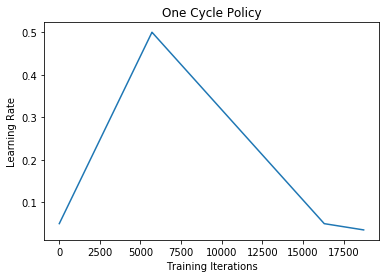

In [0]:
# Plot Learning Rate

plt.plot(slanted.history['iterations'], slanted.history['lr'])
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("One Cycle Policy")
plt.show()

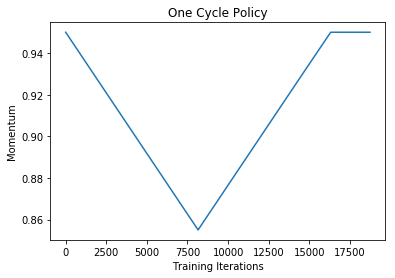

In [0]:
# Plot momentum

plt.plot(slanted.history['iterations'], slanted.history['momentum'])
plt.xlabel('Training Iterations')
plt.ylabel('Momentum')
plt.title("One Cycle Policy")
plt.show()

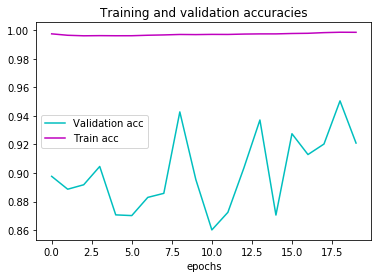

In [0]:
# Plot accuracies
val_acc = history.history['val_acc']
acc = history.history['acc']
plt.plot(range(len(val_acc)),val_acc,'c',label='Validation acc')
plt.plot(range(len(acc)),acc,'m',label='Train acc')

plt.title('Training and validation accuracies')
plt.legend()
plt.xlabel('epochs')
plt.show()

In [0]:
print(val_acc)


[0.8694800040245056, 0.8896099957466126]
